In [1]:
# -*- coding: utf-8 -*-
from utils.agent import *
from utils.dataset import *
from config import *

from IPython.display import clear_output

import sys
import traceback
import sys
import os
import tqdm as tq
import seaborn as sns

#!pip3 install torch==1.5.1 torchvision==0.6.1 -f https://download.pytorch.org/whl/cu92/torch_stable.html

# train_loader2012, val_loader2012 = read_voc_dataset(download=LOAD, year='2012')
train_loader2007, val_loader2007 = read_voc_dataset(download=LOAD, year='2007')

#####################
./datasets/
VOCdevkit/VOC2007
./datasets/VOCdevkit/VOC2007
#####################
#####################
./datasets/
VOCdevkit/VOC2007
./datasets/VOCdevkit/VOC2007
#####################


### Séparation des différents éléments du jeu de données selon la classe.

In [2]:
classes = [ 'cat', 'dog', 'bird', 'motorbike','diningtable', 'train', 'tvmonitor', 'bus', 'horse', 'car', 'pottedplant', 'person', 'chair', 'boat', 'bottle', 'bicycle', 'aeroplane', 'cow', 'sheep', 'sofa']

agents_per_class = {}
datasets_per_class = sort_class_extract([train_loader2007])
datasets_eval_per_class = sort_class_extract([val_loader2007])


### Entraînement sur chaque classe.

In [3]:
def predict_image(agent, datasets_per_class, classe):
    for i in range(20):
        index = random.choice(list(datasets_per_class[classe].keys()))
        image, gt_boxes = extract(index, datasets_per_class[classe])
        agent.predict_image(image, plot=True)

In [4]:
for i in range(1):
    classe = classes[i]
    print(f"Classe {i} :"+str(classe)+"...")
    agents_per_class[classe] = Agent(classe, alpha=0.2, num_episodes=10, load=False)
    agents_per_class[classe].train(datasets_per_class[classe])
    del agents_per_class[classe]
    torch.cuda.empty_cache()

Classe 0 :cat...
----------------->> False
Episode 0


  0%|          | 0/166 [00:00<?, ?it/s]/home/alex/.local/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
 18%|█▊        | 30/166 [00:20<01:21,  1.67it/s]/home/alex/SSS/RL/final/Active-Object-Localization-Deep-Reinforcement-Learning/utils/agent.py:243: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  non_final_next_states = Variable(torch.cat(next_states),
/home/alex/SSS/RL/final/Active-Object-Localization-Deep-Reinforcement-Learning/utils/agent.py:265: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  next_state_values.volatile = False
100%|██████████| 166

Saved
Complete
Classe 1 :dog...
----------------->> False
Episode 0


100%|██████████| 210/210 [07:51<00:00,  2.25s/it]


Saved
Complete
Classe 2 :bird...
----------------->> False
Episode 0


100%|██████████| 182/182 [08:06<00:00,  2.67s/it]


Saved
Complete
Classe 3 :motorbike...
----------------->> False
Episode 0


100%|██████████| 123/123 [04:38<00:00,  2.26s/it]


Saved
Complete
Classe 4 :diningtable...
----------------->> False
Episode 0


100%|██████████| 130/130 [04:41<00:00,  2.17s/it]


Saved
Complete
Classe 5 :train...
----------------->> False
Episode 0


100%|██████████| 128/128 [04:52<00:00,  2.28s/it]


Saved
Complete
Classe 6 :tvmonitor...
----------------->> False
Episode 0


100%|██████████| 144/144 [10:07<00:00,  4.22s/it]


Saved
Complete
Classe 7 :bus...
----------------->> False
Episode 0


100%|██████████| 100/100 [05:09<00:00,  3.09s/it]


Saved
Complete
Classe 8 :horse...
----------------->> False
Episode 0


100%|██████████| 144/144 [06:28<00:00,  2.70s/it]


Saved
Complete
Classe 9 :car...
----------------->> False
Episode 0


100%|██████████| 402/402 [25:24<00:00,  3.79s/it]


Saved
Complete
Classe 10 :pottedplant...
----------------->> False
Episode 0


100%|██████████| 153/153 [09:32<00:00,  3.74s/it]


Saved
Complete
Classe 11 :person...
----------------->> False
Episode 0


100%|██████████| 1070/1070 [1:03:08<00:00,  3.54s/it]


Saved
Complete
Classe 12 :chair...
----------------->> False
Episode 0


100%|██████████| 282/282 [20:33<00:00,  4.37s/it]


Saved
Complete
Classe 13 :boat...
----------------->> False
Episode 0


100%|██████████| 87/87 [04:12<00:00,  2.90s/it]


Saved
Complete
Classe 14 :bottle...
----------------->> False
Episode 0


100%|██████████| 153/153 [10:10<00:00,  3.99s/it]


Saved
Complete
Classe 15 :bicycle...
----------------->> False
Episode 0


100%|██████████| 122/122 [06:32<00:00,  3.21s/it]


Saved
Complete
Classe 16 :aeroplane...
----------------->> False
Episode 0


100%|██████████| 113/113 [04:33<00:00,  2.42s/it]


Saved
Complete
Classe 17 :cow...
----------------->> False
Episode 0


100%|██████████| 71/71 [03:35<00:00,  3.04s/it]


Saved
Complete
Classe 18 :sheep...
----------------->> False
Episode 0


100%|██████████| 49/49 [02:06<00:00,  2.58s/it]


Saved
Complete
Classe 19 :sofa...
----------------->> False
Episode 0


100%|██████████| 188/188 [07:54<00:00,  2.52s/it]


Saved
Complete


In [6]:
torch.cuda.empty_cache()
results = {}
for i in classes:
    results[i] = []

for i in tq.tqdm(range(1)):
    classe = classes[i]
    print("Class "+str(classe)+"...")
    agent = Agent(classe, alpha=0.2, num_episodes=1, load=True)
    res = agent.evaluate(datasets_per_class[classe])
    results[classe] = res

  0%|          | 0/20 [00:00<?, ?it/s]

Class cat...
----------------->> False
Predicting boxes...


  5%|▌         | 1/20 [00:30<09:44, 30.75s/it]

Computing recall and ap...
Final result : 
              0.1        0.2        0.3        0.4        0.5
ap      76.895394  54.133947  41.978993  30.658467  18.680617
recall  86.144578  70.481928  61.445783  52.409639  39.156627
Class dog...
----------------->> False
Predicting boxes...


 10%|█         | 2/20 [01:10<10:48, 36.05s/it]

Computing recall and ap...
Final result : 
              0.1        0.2        0.3        0.4        0.5
ap      65.418471  42.016190  23.881444  13.745545   7.589617
recall  79.047619  63.333333  47.619048  35.714286  26.190476
Class bird...
----------------->> False
Predicting boxes...


 15%|█▌        | 3/20 [01:53<11:05, 39.15s/it]

Computing recall and ap...
Final result : 
              0.1        0.2        0.3        0.4        0.5
ap      49.341059  24.798472  16.448538  13.135722   6.084254
recall  68.131868  46.153846  36.813187  30.769231  21.428571
Class motorbike...
----------------->> False
Predicting boxes...


 20%|██        | 4/20 [02:15<08:36, 32.28s/it]

Computing recall and ap...
Final result : 
              0.1        0.2        0.3        0.4        0.5
ap      61.926419  37.733446  25.068775  16.732328  10.219922
recall  74.796748  58.536585  47.154472  36.585366  27.642276
Class diningtable...
----------------->> False
Predicting boxes...


 25%|██▌       | 5/20 [02:37<07:08, 28.59s/it]

Computing recall and ap...
Final result : 
              0.1        0.2        0.3        0.4        0.5
ap      75.480769  39.760925  17.707908   6.423304   2.726907
recall  86.153846  62.307692  40.000000  23.846154  14.615385
Class train...
----------------->> False
Predicting boxes...


 30%|███       | 6/20 [02:59<06:08, 26.33s/it]

Computing recall and ap...
Final result : 
              0.1        0.2        0.3        0.4        0.5
ap      64.219493  46.365476  36.570949  20.379283  10.327956
recall  78.125000  64.062500  56.250000  43.750000  31.250000
Class tvmonitor...
----------------->> False
Predicting boxes...


 35%|███▌      | 7/20 [03:27<05:50, 26.98s/it]

Computing recall and ap...
Final result : 
             0.1        0.2        0.3       0.4       0.5
ap      14.54001   4.960375   1.508697  0.257516  0.186567
recall  37.50000  21.527778  11.111111  4.861111  4.166667
Class bus...
----------------->> False
Predicting boxes...


 40%|████      | 8/20 [03:45<04:48, 24.03s/it]

Computing recall and ap...
Final result : 
              0.1        0.2        0.3       0.4        0.5
ap      43.054923  27.391563  16.939394  13.91847  10.352814
recall  64.000000  51.000000  39.000000  35.00000  30.000000
Class horse...
----------------->> False
Predicting boxes...


 45%|████▌     | 9/20 [04:09<04:27, 24.28s/it]

Computing recall and ap...
Final result : 
              0.1        0.2        0.3        0.4        0.5
ap      77.034243  45.436954  25.039352  14.230420   6.202190
recall  86.111111  64.583333  47.222222  34.722222  23.611111
Class car...
----------------->> False
Predicting boxes...


 50%|█████     | 10/20 [09:05<18:01, 108.12s/it]

Computing recall and ap...
Final result : 
              0.1        0.2        0.3        0.4        0.5
ap      34.642065  27.169323  18.396877  12.737010   5.167210
recall  57.711443  50.497512  41.791045  34.328358  20.895522
Class pottedplant...
----------------->> False
Predicting boxes...


 55%|█████▌    | 11/20 [09:49<13:16, 88.48s/it] 

Computing recall and ap...
Final result : 
              0.1        0.2        0.3        0.4       0.5
ap      18.156893   6.748443   3.921311   3.301004  1.783099
recall  37.908497  22.222222  15.032680  12.418301  9.803922
Class person...
----------------->> False
Predicting boxes...


 60%|██████    | 12/20 [33:41<1:06:16, 497.03s/it]

Computing recall and ap...
Final result : 
              0.1        0.2        0.3        0.4        0.5
ap      45.830178  28.259465  16.928050   8.594452   3.602713
recall  66.915888  52.149533  39.906542  28.504673  18.037383
Class chair...
----------------->> False
Predicting boxes...


 65%|██████▌   | 13/20 [36:39<46:44, 400.61s/it]  

Computing recall and ap...
Final result : 
              0.1        0.2        0.3       0.4       0.5
ap      16.981223   5.995136   2.950689  1.156341  0.789754
recall  39.361702  21.631206  13.120567  7.092199  5.319149
Class boat...
----------------->> False
Predicting boxes...


 70%|███████   | 14/20 [36:57<28:30, 285.05s/it]

Computing recall and ap...
Final result : 
              0.1        0.2        0.3        0.4        0.5
ap      31.883305  18.085473   7.472573   2.136517   2.136517
recall  48.275862  36.781609  21.839080  11.494253  11.494253
Class bottle...
----------------->> False
Predicting boxes...


 75%|███████▌  | 15/20 [47:09<31:56, 383.40s/it]

Computing recall and ap...
Final result : 
              0.1        0.2        0.3        0.4        0.5
ap      14.229459   7.781607   4.571464   3.661828   2.545688
recall  33.333333  24.836601  18.300654  15.686275  11.111111
Class bicycle...
----------------->> False
Predicting boxes...


 80%|████████  | 16/20 [48:39<19:41, 295.29s/it]

Computing recall and ap...
Final result : 
              0.1        0.2        0.3        0.4        0.5
ap      38.014799  25.637657  13.809249   5.896941   2.778181
recall  59.016393  46.721311  31.967213  22.131148  14.754098
Class aeroplane...
----------------->> False
Predicting boxes...


 85%|████████▌ | 17/20 [49:09<10:46, 215.39s/it]

Computing recall and ap...
Final result : 
              0.1        0.2        0.3        0.4        0.5
ap      61.510390  41.343548  26.142851  14.311264   7.323060
recall  76.106195  61.061947  48.672566  35.398230  25.663717
Class cow...
----------------->> False
Predicting boxes...


 90%|█████████ | 18/20 [49:24<05:10, 155.22s/it]

Computing recall and ap...
Final result : 
              0.1        0.2        0.3        0.4        0.5
ap      46.335871  25.553608  14.081799   6.740670   5.534886
recall  64.788732  43.661972  30.985915  22.535211  19.718310
Class sheep...
----------------->> False
Predicting boxes...


 95%|█████████▌| 19/20 [50:42<02:11, 131.85s/it]

Computing recall and ap...
Final result : 
              0.1        0.2        0.3        0.4        0.5
ap      14.630664  13.768741  12.047493   9.385072   7.943397
recall  36.734694  34.693878  32.653061  28.571429  26.530612
Class sofa...
----------------->> False
Predicting boxes...


100%|██████████| 20/20 [51:45<00:00, 155.28s/it]

Computing recall and ap...
Final result : 
              0.1        0.2        0.3        0.4        0.5
ap      70.475064  39.194508  23.051039  13.819707   9.220436
recall  82.446809  60.638298  46.276596  34.042553  26.595745


----------------->> False


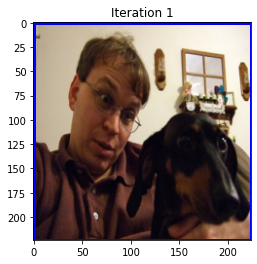

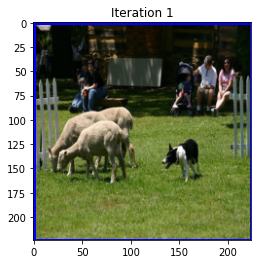

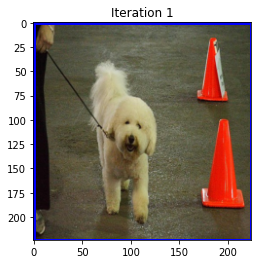

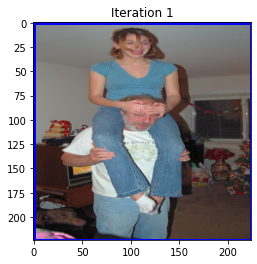

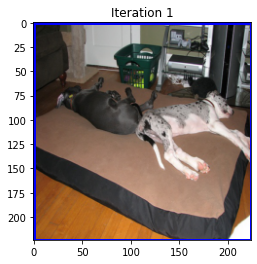

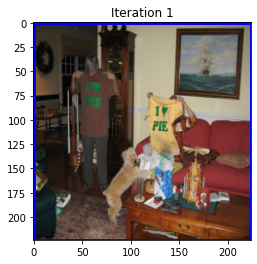

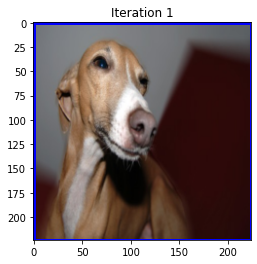

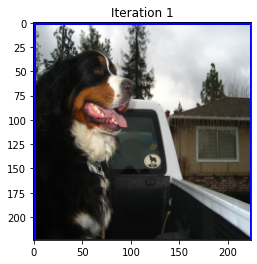

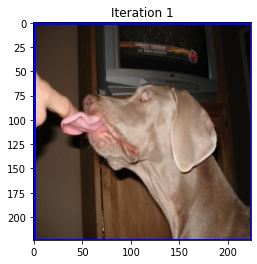

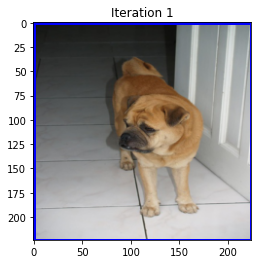

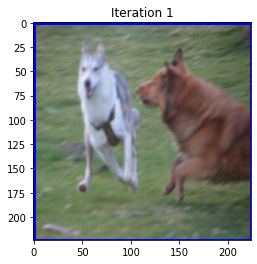

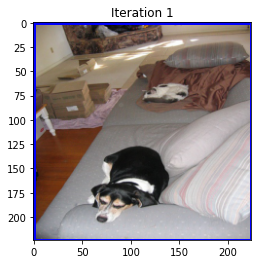

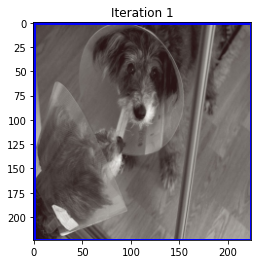

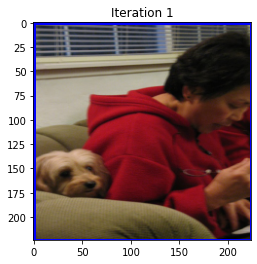

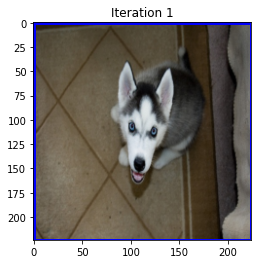

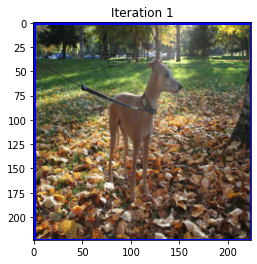

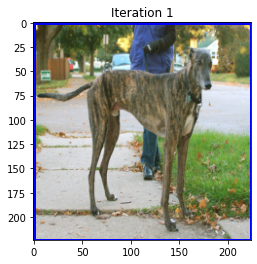

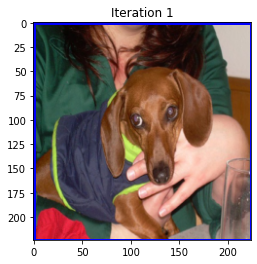

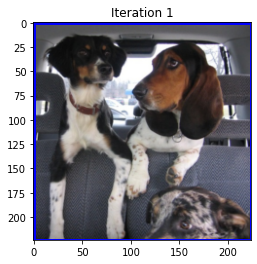

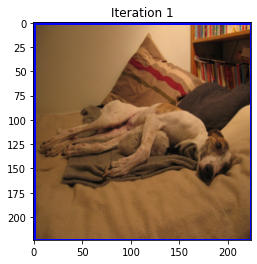

In [9]:
classe = 'dog'
agent = Agent(classe, alpha=0.2, num_episodes=25, load=True)
predict_image(agent, datasets_per_class, classe)